In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('../data/cleaned_superhero_dataset.csv')
df.head()

,first_appeared_in_issue,name,origin,publisher
0,The Legion of Super-Heroes,Lightning Lad,Alien,DC Comics
1,The Menace of Dream Girl!,Dream Girl,Alien,DC Comics
2,The War Between Supergirl and The Supermen Eme...,Brainiac 5,Alien,DC Comics
3,Hercules in the 20th Century!,Invisible Kid,Human,DC Comics
4,The War Between Supergirl and The Supermen Eme...,Phantom Girl,Alien,DC Comics


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45224 entries, 0 to 45223
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   first_appeared_in_issue  35981 non-null  object
 1   name                     45224 non-null  object
 2   origin                   45224 non-null  object
 3   publisher                45224 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [7]:
df.describe(include='all')

,first_appeared_in_issue,name,origin,publisher
count,35981,45224,45224,45224
unique,17125,40342,10,580
top,Vol. 1,Angel,Human,Marvel
freq,245,11,27561,10921


In [9]:
missing_value = df.isna().sum()
print(missing_value[missing_value > 0])

first_appeared_in_issue    9243
dtype: int64


In [10]:
df = df.dropna()

In [15]:
df['publisher'] = df['publisher'].str.lower()
df['origin'] = df['origin'].str.lower()

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_94250/2612411961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publisher'] = df['publisher'].str.lower()
/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_94250/2612411961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['origin'] = df['origin'].str.lower()


In [18]:
df['publisher'].unique().tolist()
df['origin'].unique()

array(['alien', 'human', 'radiation', 'mutant', 'robot', 'animal',
       'other', 'cyborg', 'god/eternal', 'infection'], dtype=object)

In [20]:
df.head()
df['publisher'].value_counts()

publisher
marvel               10141
dc comics             8202
vertigo               2068
dark horse comics     1358
disney                1003
                     ...  
craf publishers          1
astro comics             1
lodestone                1
down comix               1
possum press             1
Name: count, Length: 449, dtype: int64

In [29]:
major_publisher = df['publisher'].value_counts().head(5).index.tolist()

df['publisher_category'] = df['publisher']
df['publisher_category'] = df['publisher'].apply(lambda x: 'major' if x in major_publisher else 'independent')
df[['publisher_category', 'publisher']].sample(15)

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_94250/1706662225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publisher_category'] = df['publisher']
/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_94250/1706662225.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publisher_category'] = df['publisher'].apply(lambda x: 'major' if x in major_publisher else 'independent')


,publisher_category,publisher
36340,independent,idw publishing
34827,major,dc comics
9589,independent,norma editorial
38622,major,dc comics
28135,independent,king features syndicate
3309,independent,ac comics
35021,major,marvel
8251,independent,mattel
44045,independent,image
36142,major,marvel


In [30]:
df.sample()

,first_appeared_in_issue,name,origin,publisher,publisher_category
43065,Great Scientists,Robert H. Goddard,human,non-fictional,independent


Text(0, 0.5, 'Count')

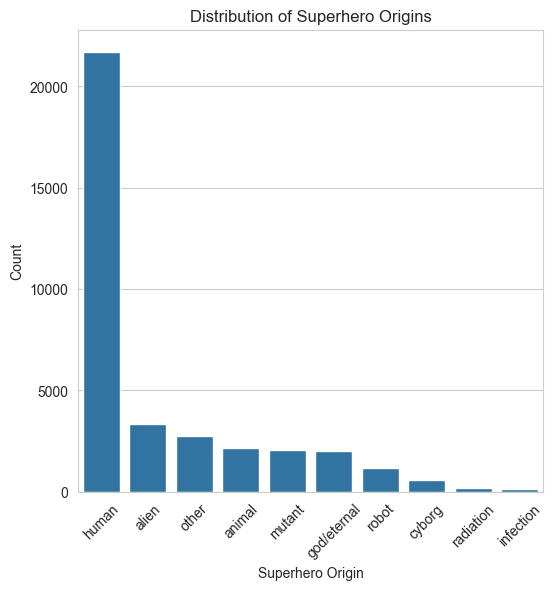

In [101]:
super_hero_origin = df['origin'].value_counts().head(20)
plt.figure(figsize=(6, 6))
sns.barplot(x=super_hero_origin.index, y=super_hero_origin.values)
plt.title('Distribution of Superhero Origins')
plt.xticks(rotation=45)
plt.xlabel('Superhero Origin')
plt.ylabel('Count')

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_94250/1024428144.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publisher_category', data=df, palette='muted')


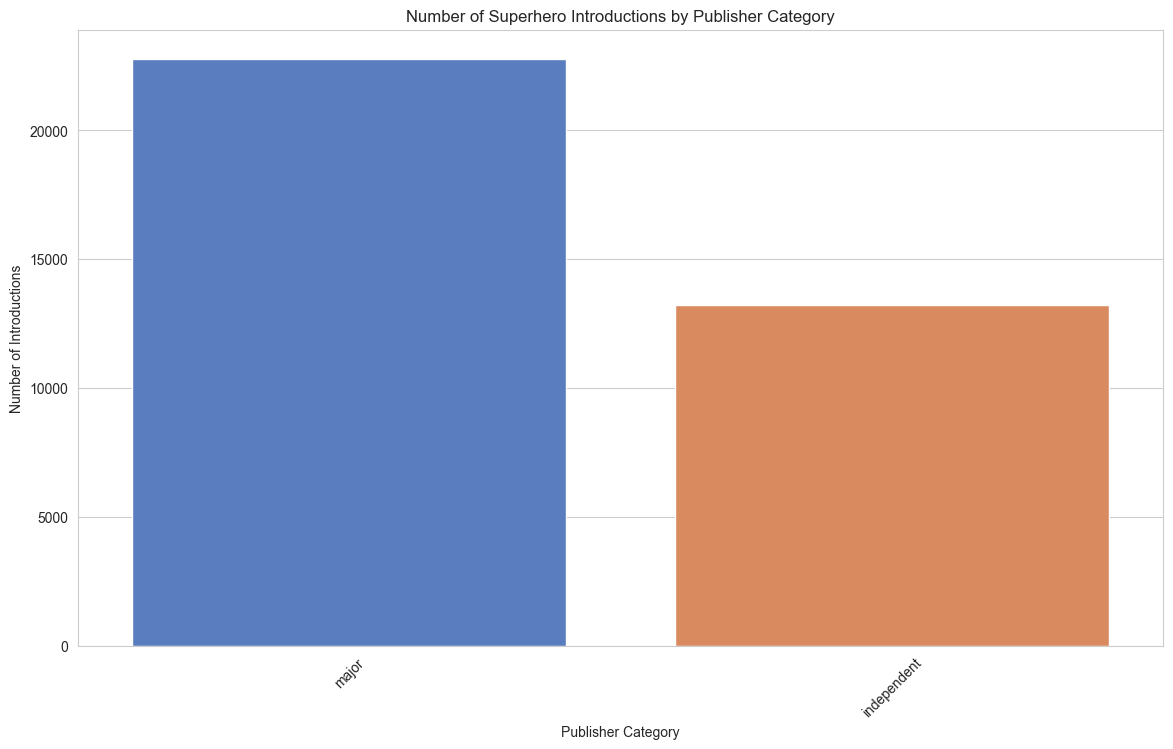

In [96]:
 plt.figure(figsize=(14, 8))
sns.countplot(x='publisher_category', data=df, palette='muted')
plt.title('Number of Superhero Introductions by Publisher Category')
plt.xlabel('Publisher Category')
plt.ylabel('Number of Introductions')
plt.xticks(rotation=45)
plt.show()

/var/folders/vx/3c_f9mjj19l20pbxwvg8l2040000gp/T/ipykernel_94250/1585129322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=superhero_publisher.values, y=superhero_publisher.index, palette='viridis')


Text(0, 0.5, 'Count')

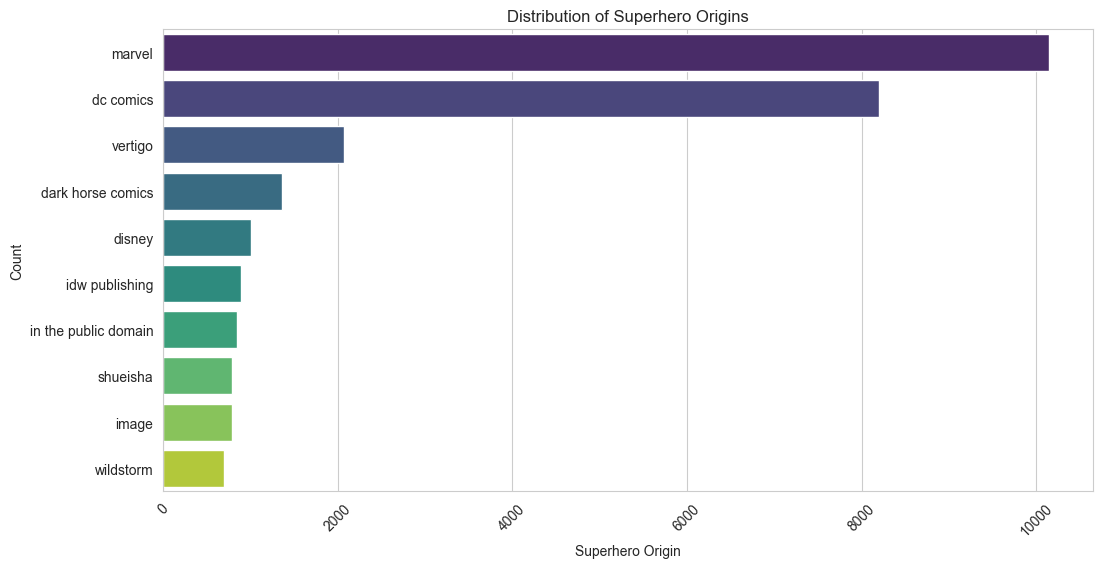

In [98]:
superhero_publisher = df['publisher'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=superhero_publisher.values, y=superhero_publisher.index, palette='viridis')
plt.title('Distribution of Superhero Origins')
plt.xticks(rotation=45)
plt.xlabel('Superhero Origin')
plt.ylabel('Count')

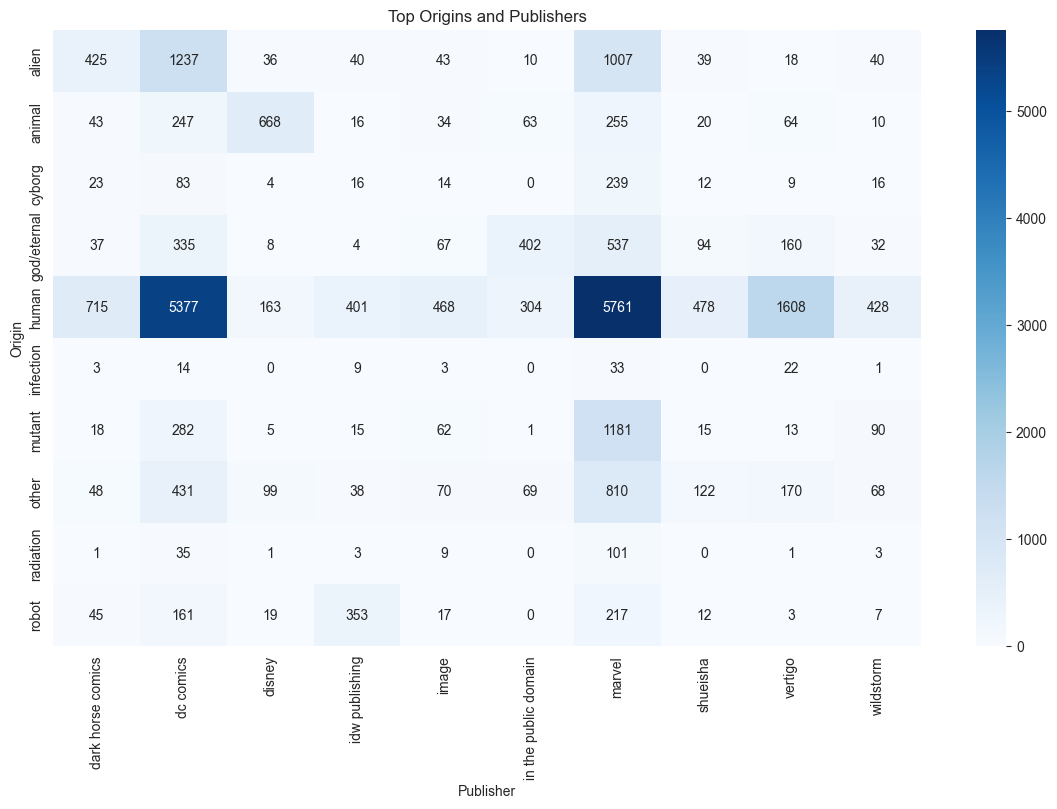

In [64]:
# Select top N origins and publishers
top_origins = df['origin'].value_counts().head(10).index  # Adjust N as needed
top_publishers = df['publisher'].value_counts().head(10).index  # Adjust N as needed

# Crosstab analysis between 'origin' and 'publisher'
origin_publisher_ct = pd.crosstab(df[df['origin'].isin(top_origins) & df['publisher'].isin(top_publishers)]['origin'], df[df['origin'].isin(top_origins) & df['publisher'].isin(top_publishers)]['publisher'])

# Heatmap of the crosstab results
plt.figure(figsize=(14, 8))
sns.heatmap(origin_publisher_ct, cmap='Blues', annot=True, fmt='d')
plt.title('Top Origins and Publishers')
plt.xlabel('Publisher')
plt.ylabel('Origin')
plt.show()

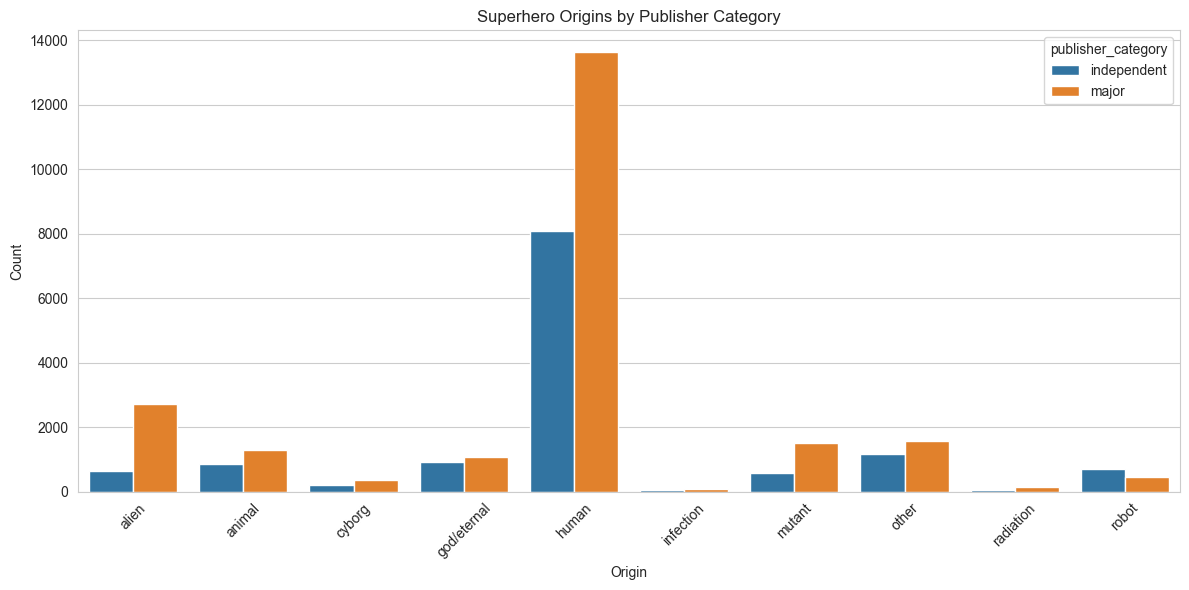

In [92]:
plt.figure(figsize=(12, 6))
sns.barplot(data=origin_per_publisher, x='origin', y='count', hue='publisher_category')
plt.title('Superhero Origins by Publisher Category')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
df.head()

,first_appeared_in_issue,name,origin,publisher,publisher_category
0,The Legion of Super-Heroes,Lightning Lad,alien,dc comics,major
1,The Menace of Dream Girl!,Dream Girl,alien,dc comics,major
2,The War Between Supergirl and The Supermen Eme...,Brainiac 5,alien,dc comics,major
3,Hercules in the 20th Century!,Invisible Kid,human,dc comics,major
4,The War Between Supergirl and The Supermen Eme...,Phantom Girl,alien,dc comics,major


In [94]:
df.head()

,first_appeared_in_issue,name,origin,publisher,publisher_category
0,The Legion of Super-Heroes,Lightning Lad,alien,dc comics,major
1,The Menace of Dream Girl!,Dream Girl,alien,dc comics,major
2,The War Between Supergirl and The Supermen Eme...,Brainiac 5,alien,dc comics,major
3,Hercules in the 20th Century!,Invisible Kid,human,dc comics,major
4,The War Between Supergirl and The Supermen Eme...,Phantom Girl,alien,dc comics,major
